# TAVAC Score Analysis for Her2 Dataset

## Introduction

This Jupyter Notebook is dedicated to analyzing the TAVAC (Training and Validation Attention Consistency) scores for the Her2 dataset. The primary objectives of this notebook are:

1. **Calculate TAVAC Scores**: Compute the TAVAC scores specifically for the Her2 dataset using the designated model.
2. **Generate Histograms**: Create histograms to visualize the distribution of TAVAC scores for a deeper understanding of model performance.

### Steps Involved:

1. **Data Loading**: Import the Her2 dataset for analysis.
2. **TAVAC Calculation**: Apply the TAVAC calculation method to the Her2 dataset.
3. **Visualization**: Generate a histogram to illustrate the distribution of TAVAC scores.

By the end of this notebook, we aim to have a detailed understanding of the TAVAC score distribution for the Her2 dataset, which can provide insights into the model's attention consistency during training and validation phases.


In [5]:
import numpy as np
from PIL import Image
import torch
from transformers import TrainingArguments, Trainer

import os


/projects/compsci/Yue/Anaconda3/envs/torch_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


None


In [6]:
import glob
import numpy as np
from datasets import Dataset, Image as ImageDs

data_set = 'Her2st'


In [ ]:
import sys
sys.path.insert(1, '/projects/li-lab/Yue/SpatialAnalysis/py') ##~wont work, has to start with /Users
sys.path.insert(1, '/projects/li-lab/Yue/SpatialAnalysis/py/Her2dataExperiments') ##~wont work, has to start with /Users

import DataHer2ST_TumorClassification as DataObj

#2-fold cross validation
np.random.seed(0)
random_indx = np.random.choice(len(DataObj.X), len(DataObj.X)//2)

train_image_url = np.array(DataObj.X)[random_indx]
test_image_url = np.delete(np.array(DataObj.X), random_indx)
train_voxels = np.array(DataObj.voxel_ids)[random_indx]

train_labels = np.array(DataObj.Y_filtered)[random_indx]
test_labels = np.delete(np.array(DataObj.Y_filtered),random_indx)
test_voxels = np.delete(np.array(DataObj.voxel_ids),random_indx)



from datasets import Dataset

train_ds = Dataset.from_dict({"img": train_image_url, "label":train_labels.astype(int)}).cast_column("img", ImageDs())
val_ds = Dataset.from_dict({"img": test_image_url, "label":test_labels.astype(int)}).cast_column("img", ImageDs())



In [8]:
train_voxels

array(['H1_11x17', 'H1_27x26', 'E1_31x23', ..., 'F1_21x20', 'H1_30x18',
       'E1_16x7'], dtype='<U8')

In [7]:
random_indx

array([2732, 2607, 1653, ...,  437, 2820, 1216])

In [8]:
test_voxels

array(['F1_7x26', 'F1_10x28', 'F1_8x9', ..., 'C1_10x20', 'C1_13x23',
       'C1_23x19'], dtype='<U8')

In [9]:
diff_corr1 = []
diff_corr2= []

for i in range(500):
    f1 = f'{data_set}_tumorPred_train_img_Stage1/{train_voxels[i]}_train.png'
    im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
    f2 = f'{data_set}_tumorPred_validation_img_Stage2/{train_voxels[i]}_test.png'
    im_array2 = np.asarray(Image.open(f2).convert('RGB'))
    cor1 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
    #print(cor1)
    
    f1 = f'{data_set}_tumorPred_train_img_Stage2/{test_voxels[i]}_train.png'
    im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
    f2 = f'{data_set}_tumorPred_validation_img_Stage1/{test_voxels[i]}_test.png'
    im_array2 = np.asarray(Image.open(f2).convert('RGB'))
    cor2 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
    #print(cor2)
    diff_corr1.append(cor1)
    diff_corr2.append(cor2)




In [10]:
import pandas as pd
tavac_df1 = pd.DataFrame(diff_corr1)
tavac_df1['spot_id'] = train_voxels[0:500]
tavac_df1['stage'] = 'Stage1'

tavac_df1.columns = ['TAVAC','spot_id','stage']

In [11]:
import pandas as pd
tavac_df2 = pd.DataFrame(diff_corr2)
tavac_df2['spot_id'] = test_voxels[0:500]
tavac_df2['stage'] = 'Stage2'

tavac_df2.columns = ['TAVAC','spot_id','stage']

In [12]:
pd.set_option('display.max_rows', None)

tavac_df = tavac_df2.append(tavac_df1)
tavac_df.index = tavac_df['spot_id']
tavac_df = tavac_df.sort_values(by=['TAVAC'], ascending=False)

tavac_df


,TAVAC,spot_id,stage
spot_id,,,
H1_22x29,0.999685,H1_22x29,Stage1
H1_21x23,0.998873,H1_21x23,Stage1
G2_10x13,0.992467,G2_10x13,Stage2
G2_6x23,0.992275,G2_6x23,Stage2
B1_17x20,0.991828,B1_17x20,Stage1
A1_20x21,0.991615,A1_20x21,Stage1
G2_8x15,0.991361,G2_8x15,Stage2
G2_12x8,0.991109,G2_12x8,Stage2
A1_15x16,0.990909,A1_15x16,Stage1


In [13]:
tavac_df.to_csv('../../output/Her2_tavac.csv')

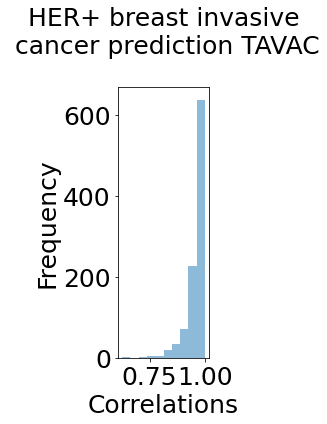

In [14]:
import matplotlib.pyplot as plt
font_size = 25

fig, ax = plt.subplots()
fig.set_size_inches(3,6)
plt.hist(tavac_df['TAVAC'], alpha = 0.5)
#plt.hist(diff_corr_overfit, alpha = 0.5, label = 'epoch=100')
#plt.hist(diff_corr_overfit100, alpha = 0.5, label = 'epoch=5000')
#plt.hist(diff_corr_overfit500, alpha = 0.5, label = 'epoch=500')

#plt.legend(loc='upper left', fontsize = font_size*0.8)
plt.ylabel('Frequency',fontsize=font_size)
plt.xlabel('Correlations',fontsize=font_size)
ax.set_title('HER+ breast invasive\n cancer prediction TAVAC\n',fontsize=font_size)
 
# Create names on the x-axis
#plt.xticks(x_pos, bars)
ax.tick_params(axis='x', labelsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)
plt.tight_layout()

In [27]:
import statistics
import numpy as np
def find_iqr(data):
    "Returns the interquartile range of a list of numbers"
    sorted_data = sorted(data)
    # numbers are sorted numerically
    q1 = np.percentile(sorted_data, 25)
    q3 = np.percentile(sorted_data, 75)
    iqr = q3 - q1
    print(f"q1: {q1}")
    print(f"q3: {q3}")
    return iqr
mean_corr = statistics.mean(tavac_df['TAVAC'])
median_corr = statistics.median(tavac_df['TAVAC'])
variance = np.var(tavac_df['TAVAC'])
iqr = (find_iqr(tavac_df['TAVAC']))
print(f"IQR: {iqr}")
print("Mean:", mean_corr)
print("Median:", median_corr)
print("Variance:", variance)

q1: 0.9493930973117117
q3: 0.9805672151573587
IQR: 0.031174117845646943
Mean: 0.9567282572659058
Median: 0.9709232980032472
Variance: 0.0016184889448808428


In [13]:
# diff_corr_overfit = []
# num_epoch = 100
# for i in range(500):
#     f1 = f'{data_set}_validation_img_2stage_e{str(num_epoch)}/{i}_test.png'
#     im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
#     f2 = f'{data_set}_train_img_e{str(num_epoch)}/{i}_train.png'
#     im_array2 = np.asarray(Image.open(f2).convert('RGB'))
#     cor1 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
#     #print(cor1)
    
#     f1 = f'{data_set}_train_img_2stage_e{str(num_epoch)}/{i}_train.png'
#     im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
#     f2 = f'{data_set}_validation_img_e{str(num_epoch)}/{i}_test.png'
#     im_array2 = np.asarray(Image.open(f2).convert('RGB'))
#     cor2 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
#     #print(cor2)
#     diff_corr_overfit.append(cor1)
#     diff_corr_overfit.append(cor2)


In [14]:
tavac_df.loc[tavac_df.spot_id=='A1_7x28']

,TAVAC,spot_id,stage
spot_id,,,
A1_7x28,0.966424,A1_7x28,Stage1


In [15]:
tavac_df.loc[tavac_df.spot_id=='F1_18x8']

,TAVAC,spot_id,stage
spot_id,,,
F1_18x8,0.625272,F1_18x8,Stage2


# TAVAC by rep

In [36]:
diff_corr1 = []
diff_corr2= []

rep = 'E1'
train_voxels_rep = [s for s in train_voxels if rep in s]
test_voxels_rep = [s for s in test_voxels if rep in s]



In [1]:
#test_voxels_rep

In [ ]:
for vx in train_voxels_rep:
    print(vx)
    f1 = f'{data_set}_tumorPred_train_img_Stage1/{vx}_train.png'
    im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
    f2 = f'{data_set}_tumorPred_validation_img_Stage2/{vx}_test.png'
    im_array2 = np.asarray(Image.open(f2).convert('RGB'))
    cor1 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
    diff_corr1.append(cor1)

    
    #print(cor1)
for vx in test_voxels_rep:
    
    f1 = f'{data_set}_tumorPred_train_img_Stage2/{vx}_train.png'
    im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
    f2 = f'{data_set}_tumorPred_validation_img_Stage1/{vx}_test.png'
    im_array2 = np.asarray(Image.open(f2).convert('RGB'))
    cor2 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
    #print(cor2)
    diff_corr2.append(cor2)

In [39]:
import pandas as pd
tavac_df1 = pd.DataFrame(diff_corr1)
tavac_df1['spot_id'] = train_voxels_rep
tavac_df1['stage'] = 'Stage1'

tavac_df1.columns = ['TAVAC','spot_id','stage']

import pandas as pd
tavac_df2 = pd.DataFrame(diff_corr2)
tavac_df2['spot_id'] = test_voxels_rep
tavac_df2['stage'] = 'Stage2'

tavac_df2.columns = ['TAVAC','spot_id','stage']

pd.set_option('display.max_rows', None)

tavac_df = tavac_df2.append(tavac_df1)
tavac_df.index = tavac_df['spot_id']
tavac_df = tavac_df.sort_values(by=['TAVAC'], ascending=False)

tavac_df
tavac_df.to_csv('../../output/Her2_tavac_' + rep + '.csv')

In [35]:
len(train_voxels_rep)

150

In [16]:
# diff_corr_overfit100 = []
# num_epoch = 3000
# for i in range(500):
#     f1 = f'{data_set}_validation_img_2stage_e{str(num_epoch)}/{i}_test.png'
#     im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
#     f2 = f'{data_set}_train_img_e{str(num_epoch)}/{i}_train.png'
#     im_array2 = np.asarray(Image.open(f2).convert('RGB'))
#     cor1 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
#     #print(cor1)
    
#     f1 = f'{data_set}_train_img_2stage_e{str(num_epoch)}/{i}_train.png'
#     im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
#     f2 = f'{data_set}_validation_img_e{str(num_epoch)}/{i}_test.png'
#     im_array2 = np.asarray(Image.open(f2).convert('RGB'))
#     cor2 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
#     #print(cor2)
#     diff_corr_overfit100.append(cor1)
#     diff_corr_overfit100.append(cor2)
